In [ ]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

% matplotlib inline

In [ ]:
df = pd.read_csv("/content/mdc.csv", encoding='latin-1')
df.head()

,Unnamed: 0,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
0,1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
1,2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2
2,3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,3
3,4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,4
4,5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,5


In [ ]:
df.describe()

,Unnamed: 0,year,runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings,id
count,90.000000,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,2006.377778,124.144444,6.552222,4.652830e+05,2.123682e+08,59.900000,266.966667,66.733333,150311.111111,45.500000
std,26.124701,14.335920,23.522192,1.271576,3.834906e+05,1.737576e+08,29.439731,144.250597,22.646179,98166.343799,26.124701
min,1.000000,1944.000000,58.000000,2.900000,8.440000e+02,0.000000e+00,0.000000,1.000000,15.000000,250.000000,1.000000
25%,23.250000,2003.250000,110.500000,5.700000,1.910570e+05,7.757250e+07,31.250000,156.250000,55.250000,50000.000000,23.250000
50%,45.500000,2011.000000,124.000000,6.900000,4.212640e+05,1.806150e+08,67.500000,277.500000,73.500000,100000.000000,45.500000
75%,67.750000,2016.000000,136.000000,7.400000,6.548668e+05,3.249725e+08,85.750000,377.250000,85.000000,250000.000000,67.750000
max,90.000000,2020.000000,244.000000,9.000000,2.369304e+06,8.583700e+08,96.000000,585.000000,95.000000,250000.000000,90.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   title           90 non-null     object 
 2   year            90 non-null     int64  
 3   genre           90 non-null     object 
 4   runtime         90 non-null     int64  
 5   mpa_rating      90 non-null     object 
 6   imdb_rating     90 non-null     float64
 7   imdb_votes      90 non-null     int64  
 8   imdb_gross      90 non-null     int64  
 9   director        90 non-null     object 
 10  stars           90 non-null     object 
 11  description     90 non-null     object 
 12  crit_consensus  90 non-null     object 
 13  tomato_meter    90 non-null     int64  
 14  tomato_review   90 non-null     int64  
 15  tom_aud_score   90 non-null     int64  
 16  tom_ratings     90 non-null     int64  
 17  entity          90 non-null     objec

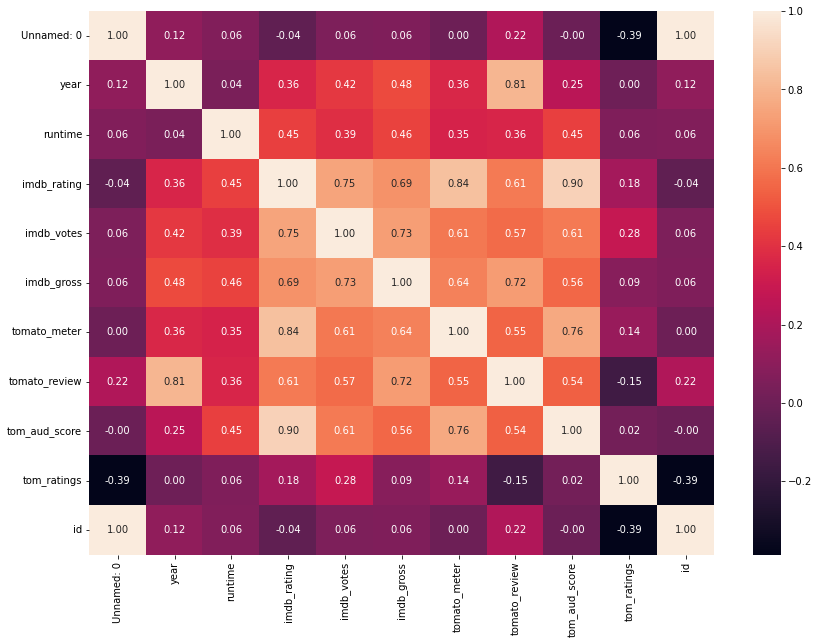

In [ ]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [ ]:
df[df.entity == 'MARVEL'].tail(5)

,Unnamed: 0,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
52,53,Captain Marvel,2019,"Action, Adventure, Sci-Fi",123,PG-13,6.8,473437,426830000,Anna Boden,"Anna Boden,Brie Larson,Samuel L. Jackson,Ben M...",Carol Danvers becomes one of the universe's mo...,"Packed with action, humor, and visual thrills,...",79,537,45,100000,MARVEL,53
53,54,Avengers: Endgame,2019,"Action, Adventure, Drama",181,PG-13,8.4,890937,858370000,Anthony Russo,"Joe Russo,Robert Downey Jr.,Chris Evans,Mark R...",After the devastating events of Avengers: Infi...,"Exciting, entertaining, and emotionally impact...",94,541,90,50000,MARVEL,54
54,55,X-Men: Dark Phoenix,2019,"Action, Adventure, Sci-Fi",113,PG-13,5.7,164427,65850000,Simon Kinberg,"Simon Kinberg,James McAvoy,Michael Fassbender,...",Jean Grey begins to develop incredible powers ...,Dark Phoenix ends an era of the X-Men franchis...,22,379,64,10000,MARVEL,55
55,56,Spider-Man: Far from Home,2019,"Action, Adventure, Sci-Fi",129,PG-13,7.5,353385,390530000,Jon Watts,"Jon Watts,Tom Holland,Samuel L. Jackson,Jake G...",Following the events of Avengers: Endgame (201...,A breezily unpredictable blend of teen romance...,90,449,95,50000,MARVEL,56
56,57,The New Mutants,2020,"Action, Horror, Mystery",94,PG-13,5.3,59535,0,Josh Boone,"Josh Boone,Maisie Williams,Anya Taylor-Joy,Cha...","Five young mutants, just discovering their abi...",Rendering a list of potentially explosive ingr...,35,126,56,2500,MARVEL,57


In [ ]:
df[df.entity == 'DC'].tail(5)

,Unnamed: 0,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
85,86,Aquaman,2018,"Action, Adventure, Fantasy",143,PG-13,6.9,400424,335060000,James Wan,"Jason Momoa,Amber Heard,Willem Dafoe,Patrick W...","Arthur Curry, the human-born heir to the under...",Aquaman swims with its entertainingly ludicrou...,65,406,74,25000,DC,86
86,87,Shazam!,2019,"Action, Adventure, Comedy",132,PG-13,7.0,279604,140370000,David F. Sandberg,"Zachary Levi,Mark Strong,Asher Angel,Jack Dyla...",A newly fostered young boy in search of his mo...,An effortlessly entertaining blend of humor an...,90,409,82,10000,DC,87
87,88,Joker,2019,"Crime, Drama, Thriller",122,R,8.4,1014748,335450000,Todd Phillips,"Joaquin Phoenix,Robert De Niro,Zazie Beetz,Fra...","In Gotham City, mentally troubled comedian Art...",Joker gives its infamous central character a c...,68,585,88,50000,DC,88
88,89,Birds of Prey,2020,"Action, Adventure, Comedy",109,R,6.1,186805,84160000,Cathy Yan,"Margot Robbie,Rosie Perez,Mary Elizabeth Winst...","After splitting with the Joker, Harley Quinn j...","With a fresh perspective, some new friends, an...",79,430,78,10000,DC,89
89,90,Wonder Woman 1984,2020,"Action, Adventure, Fantasy",151,PG-13,5.4,212554,46370000,Patty Jenkins,"Gal Gadot,Chris Pine,Kristen Wiig,Pedro Pascal",Diana must contend with a work colleague and b...,Wonder Woman 1984 struggles with sequel overlo...,59,431,73,2500,DC,90


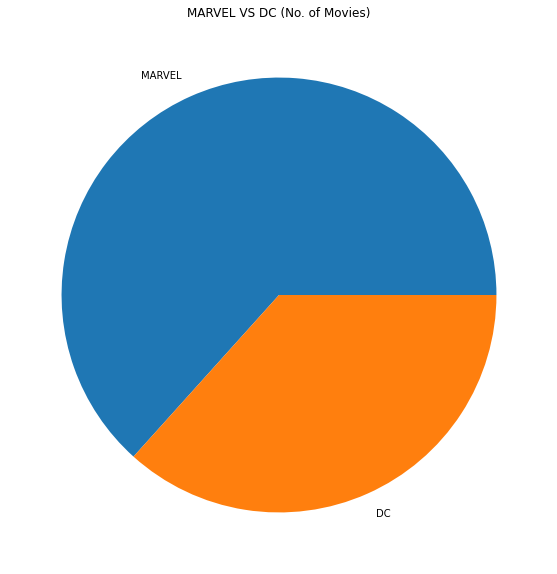

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.entity.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("MARVEL VS DC (No. of Movies)")
plt.show()

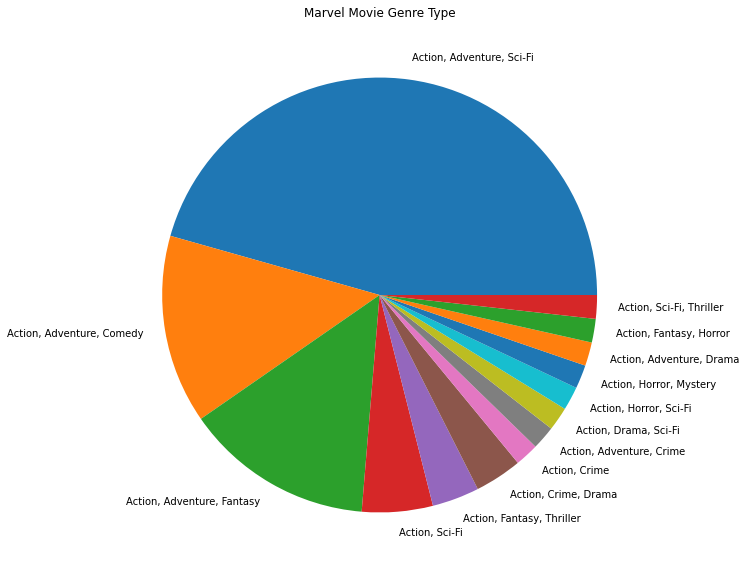

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df[df.entity == 'MARVEL'].genre.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Marvel Movie Genre Type")
plt.show()

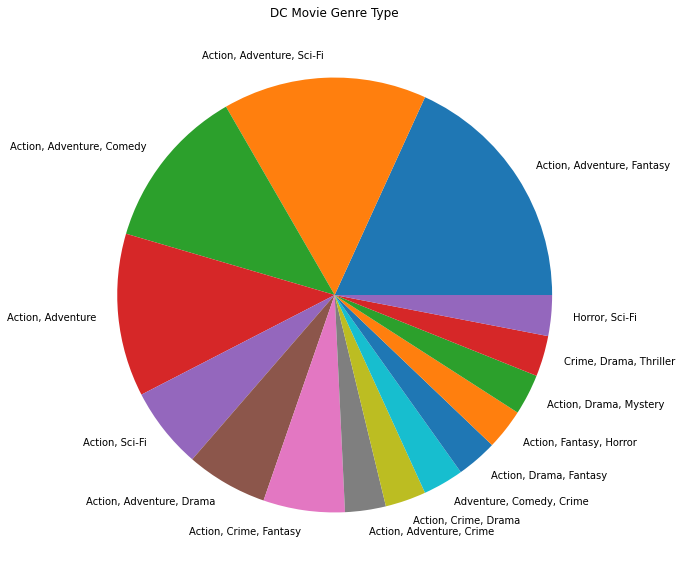

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df[df.entity == 'DC'].genre.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("DC Movie Genre Type")
plt.show()

In [ ]:
dc_movies = df[df.entity == 'DC']
marvel_movies = df[df.entity == 'MARVEL']

In [ ]:
#Average and highest rated of dc movies
avrg_dc_imdb = dc_movies['imdb_rating'].mean()
highest_dc_imdb = dc_movies['imdb_rating'].max()

print("Average: ",avrg_dc_imdb, "\n Highest: ",highest_dc_imdb)



Average:  6.133333333333335 
 Highest:  9.0


In [ ]:
#Average and highest rated of marvel movies
avrg_marvel_imdb = marvel_movies['imdb_rating'].mean()
highest_marvel_imdb = marvel_movies['imdb_rating'].max()

print("Average: ",avrg_marvel_imdb, "\n Highest: ",highest_marvel_imdb)

Average:  6.794736842105261 
 Highest:  8.4


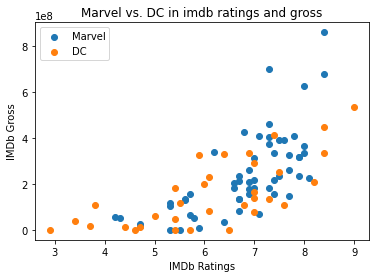

In [ ]:
plt.scatter(data = marvel_movies, x = 'imdb_rating', y = 'imdb_gross')
plt.scatter(data = dc_movies, x = 'imdb_rating', y = 'imdb_gross')
plt.title('Marvel vs. DC in imdb ratings and gross')
plt.xlabel('IMDb Ratings')
plt.ylabel('IMDb Gross')
plt.legend(['Marvel', 'DC'])

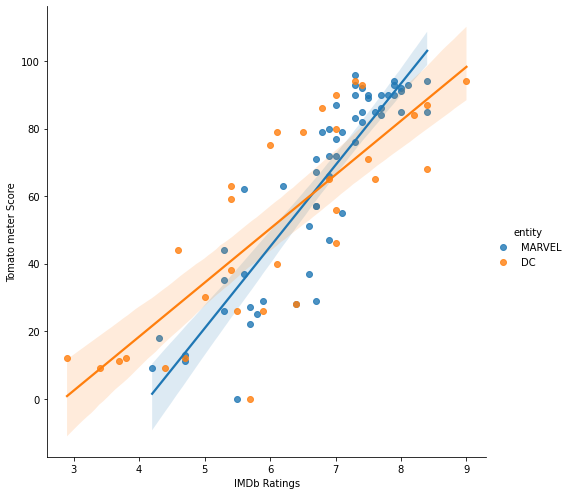

In [ ]:
imdb_vs_tm = sns.lmplot(data=df, x="imdb_rating", y="tomato_meter", hue="entity", height=7)
imdb_vs_tm.set_axis_labels("IMDb Ratings", "Tomato meter Score")

In [ ]:
# top dc movies based on imdb rating
top_dc_movie = dc_movies.groupby('title').sum().sort_values('imdb_rating', ascending=False)
top_dc_movie = top_dc_movie.reset_index()
px.bar(x='title', y ="imdb_rating", data_frame=top_dc_movie)

In [ ]:
#top marvel movies based on imdb rating
top_marvel_movie = marvel_movies.groupby('title').sum().sort_values('imdb_rating', ascending=False)
top_marvel_movie = top_marvel_movie.reset_index()
px.bar(x='title', y ="imdb_rating", data_frame=top_marvel_movie)

In [ ]:
#Marvel vs DC Runtime

avrg_marvel_runtime = marvel_movies['runtime'].mean()
highest_marvel_runtime = marvel_movies['runtime'].max()

avrg_dc_runtime = dc_movies['runtime'].mean()
highest_dc_runtime = dc_movies['runtime'].max()

print("Marvel\nAverage: ",avrg_marvel_runtime, "\n Highest: ",highest_marvel_runtime)
print("DC\nAverage: ",avrg_dc_runtime, "\n Highest: ",highest_dc_runtime)


Marvel
Average:  124.54385964912281 
 Highest:  244
DC
Average:  123.45454545454545 
 Highest:  164


In [ ]:
#top marvel movies based on imdb gross
top_marvel_movie_gross = marvel_movies.groupby('title').sum().sort_values('imdb_gross', ascending=False)
top_marvel_movie_gross = top_marvel_movie_gross.reset_index()
px.bar(x='title', y ="imdb_gross", data_frame=top_marvel_movie_gross)

In [ ]:
# top dc movies based on imdb gross
top_dc_movie_gross = dc_movies.groupby('title').sum().sort_values('imdb_gross', ascending=False)
top_dc_movie_gross = top_dc_movie_gross.reset_index()
px.bar(x='title', y ="imdb_gross", data_frame=top_dc_movie_gross)

In [ ]:
#Marvel and DC over the year based on gross earning
fig = px.line(df, x="year", y="imdb_gross", color='entity')
fig.show()

In [ ]:
fig2 = px.line(df, x='year', y='title', color='entity')
fig2.show()

In [ ]:
#This fig. show that the Marvel makes movie more frequently than DC.